In [6]:
import pandas as pd
import numpy as np
import math

In [9]:
clinical = pd.read_csv('brca_metabric_clinical_data.tsv', '\t',header = 0)
RNA_datasets = pd.read_csv('data_mrna_agilent_microarray.txt','\t',header = 0)

/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_15281/892157984.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  clinical = pd.read_csv('brca_metabric_clinical_data.tsv', '\t',header = 0)
/var/folders/z1/j91g8rbs0z5_97z1vqszz6lw0000gn/T/ipykernel_15281/892157984.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  RNA_datasets = pd.read_csv('data_mrna_agilent_microarray.txt','\t',header = 0)


In [10]:
clinical = clinical.rename(columns = {'Overall Survival (Months)' : 'surv'})

In [11]:
clinical = clinical.rename(columns = {"Patient's Vital Status" : 'surv1'})

In [12]:
from collections import Counter

In [13]:
Counter(clinical['surv1'])

Counter({'Living': 837,
         'Died of Disease': 646,
         'Died of Other Causes': 497,
         nan: 529})

In [9]:
clinical['surv1'] = [0 if i == 'Living' else 1 if i == 'Died of Disease' else 2 for i in clinical['surv1']]

In [14]:
patient = []
survival = []

for x, i in enumerate(RNA_datasets.columns.values[3:,]):
    if clinical['surv1'][x] == 2:
        continue
        print('next', i)
    
    else:
        value = (clinical.surv1[clinical['Patient ID'] == i].values)
        survival.append(clinical.surv1[x])
        patient.append(i)

In [11]:
RNA_datasets = RNA_datasets.T.drop('Hugo_Symbol')
RNA_datasets = RNA_datasets.drop('Entrez_Gene_Id')
RNA_datasets = RNA_datasets[RNA_datasets.notna()]

In [12]:
drop_values = []

for i in RNA_datasets.index:
    if i not in patient:
        drop_values.append(i)

#print(drop_values)

In [13]:
RNA_datasets.drop(drop_values, axis=0, inplace=True)

In [14]:
RNA_datasets.replace([np.inf, -np.inf], np.nan, inplace=True)
RNA_datasets.fillna(0, inplace=True)

In [15]:
Counter(survival)

Counter({0: 836, 1: 643})

In [16]:
len(RNA_datasets.columns)

20603

In [21]:
%matplotlib inline
from sklearn.model_selection import train_test_split

X = np.around(RNA_datasets)
y = survival

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(len(X_train))

from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeRegressor

tree = RandomForestClassifier(n_estimators= 20603, random_state=0)
tree.fit(X_train, y_train)

target_train_predicted = tree.predict(X_train)
target_test_predicted = tree.predict(X_test)

1035


In [22]:
fet_ind_2 = np.argsort(tree.feature_importances_)[::-1]
fet_imp = tree.feature_importances_[fet_ind_2]

In [23]:
genes_s = pd.read_csv('/clusterfs/nilah/sergio/brca_metabric/data_mrna_agilent_microarray.txt','\t',header = 0)['Hugo_Symbol'].values

/clusterfs/nilah/sergio/pypr/biopython/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


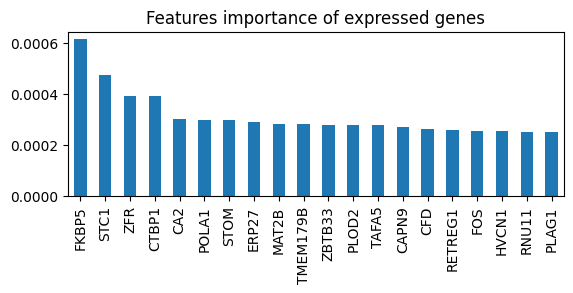

In [24]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

top_int = 20

fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 

ax0 = plt.subplot(gs[0])
pd.Series(fet_imp[:top_int], index=genes_s[fet_ind_2][:top_int]).plot(kind = 'bar', ax=ax0)
ax0.set_title('Features importance of expressed genes')
plt.xlabel('')

plt.subplots_adjust(hspace=1)
plt.show()

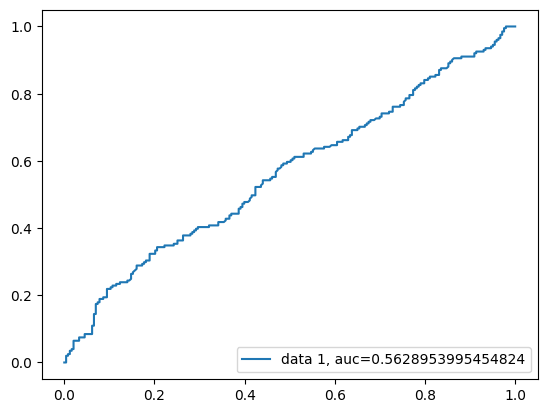

In [25]:
from sklearn import metrics

y_pred_proba = tree.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

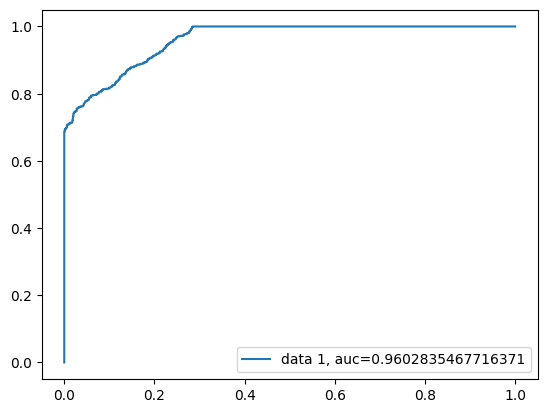

In [26]:
from sklearn import metrics

y_pred_proba = tree.predict_proba(X)[::,1]

fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
!pip list

In [ ]:
# import shap
# import matplotlib.pyplot as pl

# explainer = shap.TreeExplainer(tree)
# shap_values = explainer.shap_values(X_test)

# shap.summary_plot(shap_values, X_test, max_display = 5 , show= True)
# plt.savefig('graph_importances_png.png', bbox_inches='tight', format='png')